In [16]:
import bokeh
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 300
sns.set_theme(style="ticks", color_codes=True)
from pathlib import Path
from scipy import stats

In [17]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [18]:
ex = pd.read_csv('table_extended_PCR.csv')
ex.n_days_icu = pd.to_timedelta(ex.n_days_icu)
ex.n_days_in = pd.to_timedelta(ex.n_days_in)
ex.columns

Index(['index', '_patient_id', '_health_dep', '_age', '_gender', 'date_in',
       'n_days_in', 'worst_barthel_scale', 'n_covid_rel_dx', 'covid_rel_dx',
       'n_covid_rel_image', 'covid_rel_image', 'n_PCRs_+', 'n_days_icu',
       'worst_sofa_scale', 'worst_glasgow', 'critic', 'severity', '_discharge',
       'who_out_scale', 'satO2', 'fiO2', 'resp_rate', 'ALB', 'BNP', 'Bic',
       'Bil', 'CAL', 'CLO', 'CON', 'CPK', 'Cre', 'Dim', 'Exc', 'FG', 'FIL',
       'FOS', 'Fer', 'Fib', 'GGT', 'GLU', 'GOT', 'GPT', 'HEM', 'Hem', 'IL6',
       'LDH', 'LIN', 'Leu', 'MAG', 'MON', 'NEU', 'POT', 'PRO', 'Pla', 'Prc',
       'SOD', 'TRO', 'Tra', 'URE', 'date_icu_in', 'pCO', 'pH', 'pO2',
       'worst_glasgow_scale'],
      dtype='object')

In [22]:
from datetime import date

def format_stats(values): # mean +/- std (min-max)
    stat =  stats.describe(values)
    return f'{np.round(stat.mean, 1)} +/-{np.round(stats.tstd(values), 1)} {stat.minmax}'

def format_stats_dates(values): # mean +/- std (min-max)
    stat =  values.describe()
    s = f"{stat['mean'].days} +/-{stat['std'].days} ({stat['min'].days} , {stat['max'].days})"
    return s

def format_stats_pandas(values): # mean +/- std (min-max)
    stat =  values.describe()
    print(stat['mean'])
    s = f"{np.round(stat['mean'],1)} +/-{np.round(stat['std'],1)} ({np.round(stat['min'],1)} , {np.round(stat['max'],1)})"
    return s

today = str(date.today())
n_health_dep = ex._health_dep.nunique()
n_patients = ex._patient_id.nunique()
covid_adm = ex[( (ex['n_PCRs_+'] > 0) & ((ex['n_covid_rel_dx'] > 0) | (ex['n_covid_rel_image'] > 0) ))]
non_covid_adm = ex.loc[ex.index.difference(covid_adm.index.values)]
n_patients_covid = covid_adm._patient_id.nunique()
n_patients_non_covid = non_covid_adm._patient_id.nunique()

age = format_stats(covid_adm._age.values)  
gender = np.round(covid_adm[covid_adm._gender == 'man'].shape[0] * 100 / covid_adm.shape[0], 1)
age_men = format_stats(covid_adm[covid_adm._gender == 'man']._age.values)
age_women = format_stats(covid_adm[covid_adm._gender == 'woman']._age.values)
mort_men = np.round(covid_adm[(covid_adm._gender == 'man') & (covid_adm.severity == 5)].shape[0] * 100 / covid_adm[(covid_adm._gender == 'man')].shape[0], 1)
mort_women = np.round(covid_adm[(covid_adm._gender == 'woman') & (covid_adm.severity == 5)].shape[0] * 100 / covid_adm[(covid_adm._gender == 'woman')].shape[0], 1)
age_mort_men = format_stats(covid_adm[(covid_adm._gender == 'man') &  (covid_adm.severity == 5)]._age.values)
age_mort_women =  format_stats(covid_adm[(covid_adm._gender == 'woman') & (covid_adm.severity == 5)]._age.values)
n_icu_adm = covid_adm[(covid_adm.n_days_icu > pd.Timedelta(0, unit='h')) ].shape[0]
p_n_icu_adm = np.round(100 * n_icu_adm / covid_adm.shape[0], 1)
length_adm = format_stats_dates(covid_adm.n_days_in)
non_covid_length_adm = format_stats_dates(non_covid_adm.n_days_in)
length_icu = format_stats_dates( covid_adm[(covid_adm.n_days_icu > pd.Timedelta(0, unit='h')) ].n_days_icu)
non_covid_length_icu = format_stats_dates(non_covid_adm[(non_covid_adm.n_days_icu > pd.Timedelta(0, unit='h')) ].n_days_icu)
barthel = format_stats_pandas(covid_adm.worst_barthel_scale)
p_barthel = np.round(100 * covid_adm.worst_barthel_scale.describe()['count'] / covid_adm.shape[0], 1)

74.83937397034596


In [23]:
pd.Series([dx for x in covid_adm.covid_rel_dx for dx in eval(x.replace("'", "',"))]).value_counts()

,OTROS TIPOS DE NEUMONIA VIRICA                                                                                1561
,OTROS CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFICADAS BAJO OTRO CONCEPTO                                  1401
,SARS-COV-2                                                                                                     679
,INSUFICIENCIA RESPIRATORIA AGUDA CON HIPOXIA                                                                   259
,OTROS TRASTORNOS RESPIRATORIOS ESPECIFICADOS                                                                   172
,INSUFICIENCIA RESPIRATORIA AGUDA NO ESPECIFICADA SI CON HIPOXIA O CON HIPERCAPNIA                              152
,INFECCION AGUDA DEL TRACTO RESPIRATORIO INFERIOR, NO ESPECIFICADA                                              142
,SINDROME DE DIFICULTAD RESPIRATORIA [DISTRES RESPIRATORIO]                                                     102
,INFECCION DEBIDA A CORONAVIRUS, NO ESPECIFICADA                        

In [24]:
pd.Series([dx for x in non_covid_adm.covid_rel_dx for dx in eval(x.replace("'", "',"))]).value_counts()

,OTROS TIPOS DE NEUMONIA VIRICA                                                                         326
,SARS-COV-2                                                                                             235
,OTROS CORONAVIRUS COMO CAUSA DE ENFERMEDADES CLASIFICADAS BAJO OTRO CONCEPTO                           228
,OTROS TRASTORNOS RESPIRATORIOS ESPECIFICADOS                                                            90
,NEUMONIA, NMICROORGANISMO NO ESPECIFICADO                                                               87
,INFECCION AGUDA DEL TRACTO RESPIRATORIO INFERIOR, NO ESPECIFICADA                                       85
,DEPENDENCIA DE OXIGENO SUPLEMENTARIO                                                                    78
,INSUFICIENCIA RESPIRATORIA AGUDA NO ESPECIFICADA SI CON HIPOXIA O CON HIPERCAPNIA                       69
,INSUFICIENCIA RESPIRATORIA AGUDA CON HIPOXIA                                                            68
,DETERIORO COGNITIVO LEVE   

As of {{today}}, {{n_health_dep}} different health departments from the Valencian Region contributed the clinical data from all the hospital admissions of patients who had at least one positive covid test (serological or PCR) at any time and at least one hospital admission, covering different periods of time for each health department (see table x admissions by health departments). The source population totaled {{n_patients}} patients corresponding to {{ex.shape[0]}} hospital admissions.

After selecting* only those admissions associated to any covid-related manifestation (referred as covid-related admissions) and not limited to the respiratory system (see list of icd-10 covid-related conditions in table x), the covid-related study population totaled {{n_patients_covid}} patients corresponding to {{covid_adm.shape[0]}} hospital admissions. 
* Selection criteria for admissions required at least 1 sars-cov-2 PCR positive test in a period extending from 3 weeks before admission to the discharge AND either having any covid related diagnosis at discharge  or having any image finding suggestive of covid pneumonia (see list of covid image findings at table x).



For covid-related admissions, the mean age of patients was {{age}} years and {{gender}}% were male. The mean age of hospitalized men were {{age_men}} vs {{age_women}} years in women (see age distribution in graph x). 
Mortality was higher for men {{mort_men}}% vs women {{mort_women}}%, being the mean age at death of {{age_mort_men}} and {{age_mort_women}} years respectively (see distribution of mortality by age and gender in graph x)
There were a total of {{n_icu_adm}}({{p_n_icu_adm}}%) ICU admissions with a length of {{length_icu}} days vs  {{non_covid_length_icu}} days for non-covid related ICU admissions. The mean hospitalization length of covid related admissions was {{length_adm}} days vs {{non_covid_length_adm}} days for non-covid related admissions. 


Barthel independence scale was available for {{p_barthel}}% of patients with a mean value of {{barthel}}. The most common reasons for covid-related admission was by descending order [  (%), (%), (%), ... ].  The most common reasons for non-covid-related admissions from the source population (n = ) was by descending order [  (%), (%), (%), ... ]. 


The severity grade for covid-related admissions defined as G 1-mild (patients admitted to the emergency room but discharged without requiring hospitalization), G 2-moderate (hospitalization <= 5 days), G 3-severe (prolonged hospitalization > 5 days), G 4-critical (life threatening requiring intensive care) and G 5-fatal is shown in graph x. 

The distribution of type of discharge for covid vs non-covid admissions is shown in graph x.

Within {{}} days of discharge, [ (%)]  of these discharged patients were readmitted to hospital and [ (%)]  died. The most common reasons for readmission was by descending order [  (%), (%), (%), ... ]. Moreover, during re-admission, {{}}% required intensive care treatment, {{}}% were mechanically ventilated and {{}}% received vasopressors. 


The WHO COVID Outcomes Scale (Cao et al. (2020) was used as a measure of covid treatments efficacy, admission evolution and outcome. This ordinal scale assesses the clinical status based on the required intensity of medical intervention, with higher scores for interventions more burdensome for the patient, and highest score for death: 
    7, death; 
    6, hospitalized, receiving extracorporeal membrane oxygenation (ECMO) or invasive mechanical ventilation; 
    5, hospitalized, receiving noninvasive mechanical ventilation or nasal high-flow oxygen therapy; 
    4, hospitalized, receiving supplemental oxygen without positive pressure or high flow; 
    3, hospitalized, not receiving supplemental oxygen; 
    2, not hospitalized and unable to perform normal activities; 
    1, not hospitalized and able to perform normal activities.
Following recommendations by [https://www.tandfonline.com/doi/full/10.1080/19466315.2020.1811148 ] instead of using a limited number of time-point evaluations, a daily trajectory of the score over all days of admissions was obtained for each patient. Graph x shows  the mean trajectory of the outcome scores for covid-related admissions.



In [25]:
covid_adm.groupby(['_gender', '_health_dep'])['n_PCRs_+'].mean().unstack()

_health_dep,1,2,5,6,8,12,17,18,19,20,21
_gender,,,,,,,,,,,
man,2.537037,2.802030,1.849123,1.823529,1.591549,1.923077,1.862069,1.877358,1.774648,1.533333,1.863636
woman,2.189189,2.577778,2.004255,2.308824,1.607843,1.945455,1.628099,1.730000,1.634409,1.414286,2.030303


In [5]:
generate_views = False

/home/auri/anaconda3/envs/bokeh/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/bokeh/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/bokeh/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/auri/anaconda3/envs/bokeh/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*ar

Admissions distribution by age and sex


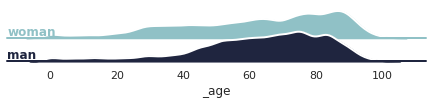

In [6]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data


df = ex[['_age', '_gender']]

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(2, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="_gender", hue="_gender", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "_age",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "_age", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "_age")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
print("Admissions distribution by age and sex")

In [202]:
ex.describe()

,index,_health_dep,_age,n_days_in,worst_barthel_scale,n_covid_rel_dx,n_covid_rel_image,n_PCRs_+,n_days_icu,worst_sofa_scale,worst_glasgow,severity,worst_glasgow_scale
count,5435.000000,5435.000000,5435.000000,5435,2493.000000,5435.000000,5435.000000,5435.000000,5435,69.000000,0.0,5299.000000,92.000000
mean,0.271389,11.588040,62.263661,8 days 13:35:30.855565777,73.194946,1.386017,0.892364,0.890524,1 days 01:30:09.736890524,1.492754,NaN,2.814493,12.152174
std,0.734138,7.275566,21.696315,10 days 02:13:43.069499078,38.286311,1.328611,1.895117,1.484298,5 days 16:59:12.640016785,1.346271,NaN,0.882557,4.327105
min,0.000000,1.000000,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,-8 days +21:36:00,0.000000,NaN,2.000000,3.000000
25%,0.000000,5.000000,49.000000,3 days 00:00:00,45.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,NaN,2.000000,10.000000
50%,0.000000,12.000000,66.000000,6 days 00:00:00,100.000000,1.000000,0.000000,0.000000,0 days 00:00:00,1.000000,NaN,3.000000,15.000000
75%,0.000000,19.000000,79.000000,10 days 00:00:00,100.000000,2.000000,1.000000,1.000000,0 days 00:00:00,2.000000,NaN,3.000000,15.000000
max,10.000000,21.000000,100.000000,126 days 00:00:00,100.000000,9.000000,27.000000,18.000000,100 days 21:36:00,6.000000,NaN,5.000000,15.000000


In [203]:
#Severity grade (following AE grading system 1-5: 
        #1-mild(ER only, does not require hospitalization), 
        #2-moderate( hospitalization <= 5 days)
        #3-severe(prolongs hospitalization > 5 days), 
        #4-critical(life threatening = UCI), 
        #5-fatal 

In [204]:
ex.columns

Index(['index', '_patient_id', '_health_dep', '_age', '_gender', 'date_in',
       'n_days_in', 'worst_barthel_scale', 'n_covid_rel_dx', 'covid_rel_dx',
       'n_covid_rel_image', 'covid_rel_image', 'n_PCRs_+', 'n_days_icu',
       'worst_sofa_scale', 'worst_glasgow', 'critic', 'severity', '_discharge',
       'who_out_scale', 'date_icu_in', 'worst_glasgow_scale'],
      dtype='object')

In [205]:
filtered_admissions = ex[((ex['n_PCRs_+'] > 0) & ((ex.n_covid_rel_dx > 0) | (ex.n_covid_rel_image > 0)))]
if generate_views:
    filtered_admissions = ex[((ex['n_PCRs_+'] > 0) & ((ex.n_covid_rel_dx > 0) | (ex.n_covid_rel_image > 0)))]
    filtered_admissions.to_csv('all_filtered_admissions.csv', index = False)
    samples_tagtog = filtered_admissions.groupby('_health_dep').sample(frac=0.15, replace=False, random_state=1)
    samples_tagtog.to_csv('15%_random_sampling_filtered_admissions.csv')

In [206]:
if generate_views: #validate admission filter with manual selected list
    df_19 = ex[ex._health_dep == 19]
    print(df_19._patient_id.nunique())
    df_19[((df_19['n_PCRs_+'] > 0) & ((df_19.n_covid_rel_dx > 0) | (df_19.n_covid_rel_image > 0)))].to_csv('19_filtered_admissions.csv', index = False)
    path= Path('19_true')
    list_true = [f.name.replace('.txt', '') for f in path.iterdir()]
    list_filtered = df_19[((df_19['n_PCRs_+'] > 0) & ((df_19.n_covid_rel_dx > 0) | (df_19.n_covid_rel_image > 0)))]._patient_id
    print(len(set(list_filtered) and set(list_true)))
    print(len(set(list_filtered)))
    print(df_19[((df_19['n_PCRs_+'] > 0) & ((df_19.n_covid_rel_dx > 0) | (df_19.n_covid_rel_image > 0)))].shape[0])

In [207]:
df = ex.groupby('severity')._patient_id.count().reset_index()
df['admissions'] = df._patient_id
df

,severity,_patient_id,admissions
0,2.0,2178,2178
1,3.0,2394,2394
2,4.0,259,259
3,5.0,468,468


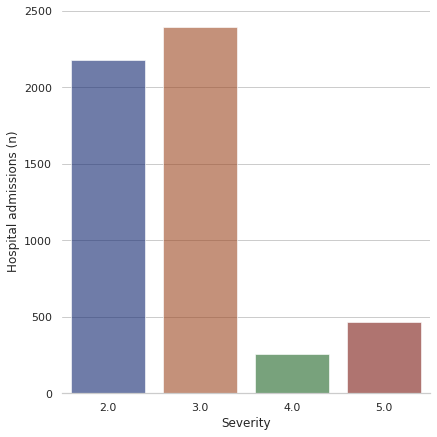

In [208]:
sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="severity", y="admissions",
    ci="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Severity", "Hospital admissions (n)")


In [16]:
ex.severity.describe()

count    5299.000000
mean        2.814493
std         0.882557
min         2.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: severity, dtype: float64

In [18]:
ex['critic_bool'] =  False
ex.loc[(ex.critic != 'False'), 'critic_bool'] =  True

df = ex.groupby('critic_bool')._patient_id.count().reset_index()
df['admissions'] = df._patient_id
df

,critic_bool,_patient_id,admissions
0,False,4708,4708
1,True,727,727


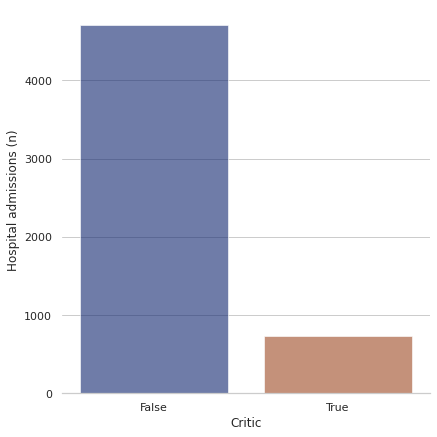

In [19]:

sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="critic_bool", y="admissions",
    ci="sd", palette="dark", alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Critic", "Hospital admissions (n)")


In [20]:
ex.n_days_in = pd.to_timedelta(ex.n_days_in)
ex.n_days_in

0       1 days
1       7 days
2       4 days
3       7 days
4       6 days
         ...  
5430    6 days
5431    7 days
5432   21 days
5433    9 days
5434    2 days
Name: n_days_in, Length: 5435, dtype: timedelta64[ns]

In [21]:
ex.loc[ex.n_covid_rel_dx > 0].n_days_in.describe()

count                          3386
mean     10 days 12:30:37.212049616
std      10 days 21:44:43.360610956
min                 0 days 00:00:00
25%                 5 days 00:00:00
50%                 8 days 00:00:00
75%                12 days 00:00:00
max               126 days 00:00:00
Name: n_days_in, dtype: object

In [22]:
ex.loc[ex.n_covid_rel_dx == 0].n_days_in.describe()

count                         2049
mean     5 days 08:03:30.834553440
std      7 days 13:05:11.597171799
min                0 days 00:00:00
25%                2 days 00:00:00
50%                3 days 00:00:00
75%                6 days 00:00:00
max              120 days 00:00:00
Name: n_days_in, dtype: object

In [23]:
ex.loc[ex.n_covid_rel_image > 0].n_days_in.describe()

count                          2235
mean     12 days 04:09:20.536912751
std      12 days 05:50:00.547765875
min                 1 days 00:00:00
25%                 6 days 00:00:00
50%                 9 days 00:00:00
75%                14 days 00:00:00
max               126 days 00:00:00
Name: n_days_in, dtype: object

In [24]:
ex.loc[ex.n_covid_rel_image == 0].n_days_in.describe()

count                         3200
mean               6 days 01:07:57
std      7 days 06:35:35.497600111
min                0 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max              120 days 00:00:00
Name: n_days_in, dtype: object

In [25]:
ex.loc[ex['n_PCRs_+'] > 0].n_days_in.describe()

count                          2488
mean     11 days 20:57:06.366559485
std      11 days 23:49:42.974348185
min                 0 days 00:00:00
25%                 5 days 00:00:00
50%                 9 days 00:00:00
75%                14 days 00:00:00
max               126 days 00:00:00
Name: n_days_in, dtype: object

In [26]:
ex.loc[ex['n_PCRs_+'] == 0].n_days_in.describe()

count                         2947
mean     5 days 18:35:32.880895826
std      7 days 00:45:43.043246398
min                0 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max              120 days 00:00:00
Name: n_days_in, dtype: object

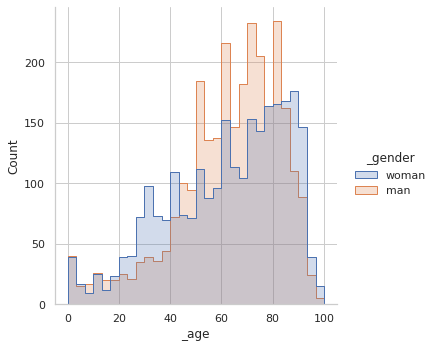

In [27]:
penguins = sns.load_dataset("penguins")
sns.displot(ex, x="_age", hue="_gender", element="step")

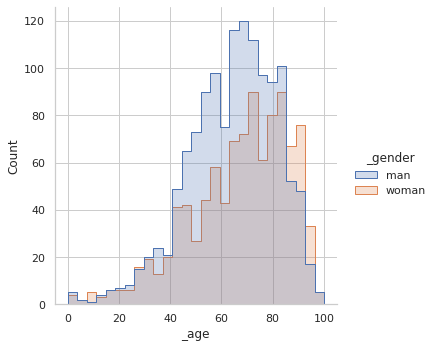

In [28]:
sns.displot(filtered_admissions , x="_age", hue="_gender", element="step")

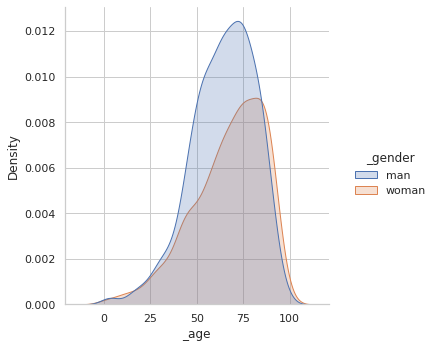

In [29]:
sns.displot(filtered_admissions , x="_age", hue="_gender", kind="kde", fill=True)

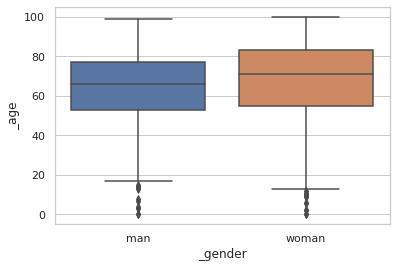

In [30]:

ax = sns.boxplot(x="_gender", y="_age", data=filtered_admissions)

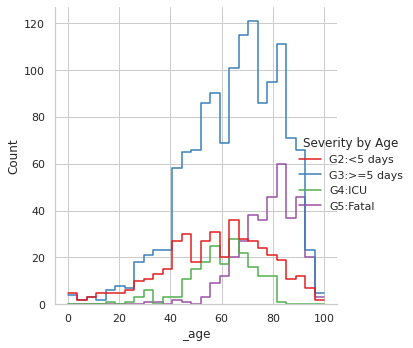

In [31]:


g = sns.displot(data = filtered_admissions , x="_age", hue="severity", element = 'step', fill=False, palette="Set1")

# title
new_title = 'Severity by Age'
g._legend.set_title(new_title)
# replace labels
new_labels = ['G2:<5 days', 'G3:>=5 days', 'G4:ICU', 'G5:Fatal']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)




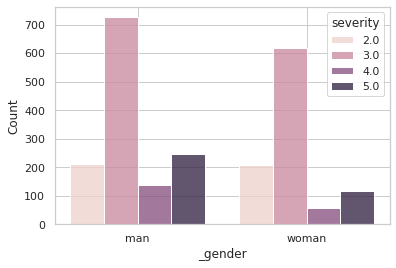

In [32]:
sns.histplot(data=filtered_admissions, x="_gender", hue="severity", multiple="dodge", shrink=.8)
# title
new_title = 'Severity by Gender'
g._legend.set_title(new_title)

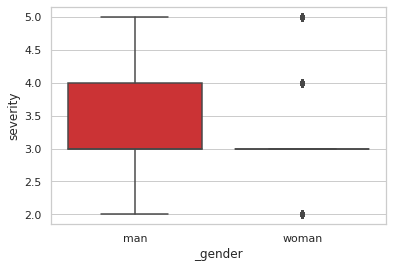

In [33]:
ax = sns.boxplot(x="_gender", y="severity", palette="Set1",  data=filtered_admissions)

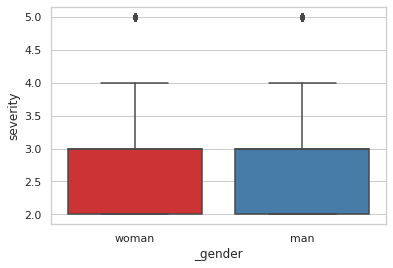

In [34]:
ax = sns.boxplot(x="_gender", y="severity", palette="Set1",  data=ex)

In [35]:
filtered_admissions[(filtered_admissions._gender == 'woman') ].severity.describe()

count    998.000000
mean       3.081162
std        0.850055
min        2.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: severity, dtype: float64

In [36]:
filtered_admissions[(filtered_admissions._gender == 'man') ].severity.describe()

count    1323.000000
mean        3.315193
std         0.954155
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: severity, dtype: float64

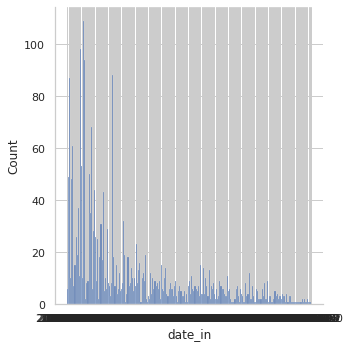

In [37]:
#Fatalities by date
sns.displot(filtered_admissions , x="date_in", element="bars")

In [38]:
filtered_admissions[(filtered_admissions._discharge.isin( ['Éxitus', 'In extremis']))].groupby('_gender').describe()


index                                              _health_dep  \
         count      mean       std  min  25%  50%  75%  max       count   
_gender                                                                   
man      243.0  0.201646  0.534432  0.0  0.0  0.0  0.0  3.0       243.0   
woman    116.0  0.198276  0.531116  0.0  0.0  0.0  0.0  3.0       116.0   

                                                           _age             \
              mean       std  min  25%  50%    75%   max  count       mean   
_gender                                                                      
man      10.288066  6.921590  1.0  5.0  8.0  18.00  21.0  243.0  76.781893   
woman     9.956897  6.619329  1.0  5.0  7.0  17.25  21.0  116.0  82.905172   

                                                  worst_barthel_scale  \
               std   min    25%   50%   75%   max               count   
_gender                                                                 
man      11.044508  31.0  70.00  78.0  84.0  99.0               106.0   
woman     8.966584  52.0  78.75  85.0  89.0  96.0                53.0   

                                                            n_covid_rel_dx  \
              mean        std  min  25%   50%    75%    max          count   
_gender                                                                      
man      49.292453  43.939562  0.0  0.0  50.0  100.0  100.0          243.0   
woman    27.075472  36.865582  0.0  0.0   5.0   45.0  100.0          116.0   

                                                     n_covid_rel_image  \
             mean       std  min  25%  50%  75%  max             count   
_gender                                                                  
man      2.674897  1.031161  0.0  2.0  3.0  3.0  6.0             243.0   
woman    2.750000  0.931338  1.0  2.0  3.0  3.0  5.0             116.0   

                                                       n_PCRs_+            \
             mean       std  min  25%  50%   75%   max    count      mean   
_gender                                                                     
man      1.831276  3.051949  0.0  0.0  1.0  2.00  22.0    243.0  1.790123   
woman    1.370690  1.976075  0.0  0.0  1.0  1.25  13.0    116.0  1.551724   

                                           worst_sofa_scale                 \
              std  min  25%  50%  75%  max            count mean       std   
_gender                                                                      
man      1.370130  1.0  1.0  1.0  2.0  9.0              4.0  3.5  2.081666   
woman    1.090232  1.0  1.0  1.0  2.0  8.0              1.0  1.0       NaN   

                                 worst_glasgow                               \
         min  25%  50%  75%  max         count mean std min 25% 50% 75% max   
_gender                                                                       
man      1.0  2.5  3.5  4.5  6.0           0.0  NaN NaN NaN NaN NaN NaN NaN   
woman    1.0  1.0  1.0  1.0  1.0           0.0  NaN NaN NaN NaN NaN NaN NaN   

        severity                                    worst_glasgow_scale  \
           count mean  std  min  25%  50%  75%  max               count   
_gender                                                                   
man        243.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0                 9.0   
woman      116.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0                 4.0   

                                                         
             mean       std  min  25%   50%   75%   max  
_gender                                                  
man      8.888889  4.807402  3.0  3.0  10.0  13.0  14.0  
woman    6.000000  6.000000  3.0  3.0   3.0   6.0  15.0

In [39]:
filtered_admissions.groupby('_gender').describe()

index                                              _health_dep  \
          count      mean       std  min  25%  50%  75%  max       count   
_gender                                                                    
man      1325.0  0.128302  0.429456  0.0  0.0  0.0  0.0  5.0      1325.0   
woman     998.0  0.117234  0.402205  0.0  0.0  0.0  0.0  3.0       998.0   

                                                           _age             \
              mean       std  min  25%  50%   75%   max   count       mean   
_gender                                                                      
man      10.928302  7.211950  1.0  5.0  8.0  18.0  21.0  1325.0  64.180377   
woman    10.696393  7.038724  1.0  5.0  8.0  18.0  21.0   998.0  66.962926   

                                                 worst_barthel_scale  \
               std  min   25%   50%   75%    max               count   
_gender                                                                
man      17.211627  0.0  53.0  66.0  77.0   99.0               691.0   
woman    19.327034  0.0  55.0  71.0  83.0  100.0               523.0   

                                                              n_covid_rel_dx  \
              mean        std  min   25%    50%    75%    max          count   
_gender                                                                        
man      78.929088  35.468041  0.0  70.0  100.0  100.0  100.0         1325.0   
woman    69.435946  40.375598  0.0  30.0  100.0  100.0  100.0          998.0   

                                                     n_covid_rel_image  \
             mean       std  min  25%  50%  75%  max             count   
_gender                                                                  
man      2.445283  1.028037  0.0  2.0  2.0  3.0  9.0            1325.0   
woman    2.238477  0.907587  0.0  2.0  2.0  3.0  7.0             998.0   

                                                      n_PCRs_+            \
             mean       std  min  25%  50%  75%   max    count      mean   
_gender                                                                    
man      1.938113  2.767273  0.0  0.0  1.0  2.0  22.0   1325.0  1.972075   
woman    1.507014  2.209093  0.0  0.0  1.0  2.0  27.0    998.0  1.937876   

                                            worst_sofa_scale            \
              std  min  25%  50%  75%   max            count      mean   
_gender                                                                  
man      1.625878  1.0  1.0  1.0  2.0  13.0             38.0  1.789474   
woman    1.792145  1.0  1.0  1.0  2.0  18.0             15.0  1.266667   

                                           worst_glasgow                       \
              std  min  25%  50%  75%  max         count mean std min 25% 50%   
_gender                                                                         
man      1.454869  0.0  1.0  2.0  3.0  6.0           0.0  NaN NaN NaN NaN NaN   
woman    1.099784  0.0  0.0  1.0  2.0  3.0           0.0  NaN NaN NaN NaN NaN   

                severity                                               \
        75% max    count      mean       std  min  25%  50%  75%  max   
_gender                                                                 
man     NaN NaN   1323.0  3.315193  0.954155  2.0  3.0  3.0  4.0  5.0   
woman   NaN NaN    998.0  3.081162  0.850055  2.0  3.0  3.0  3.0  5.0   

        worst_glasgow_scale                                                    
                      count       mean       std  min   25%   50%   75%   max  
_gender                                                                        
man                    40.0  12.175000  4.319826  3.0  10.0  15.0  15.0  15.0  
woman                  17.0  11.470588  4.570526  3.0   9.0  13.0  15.0  15.0

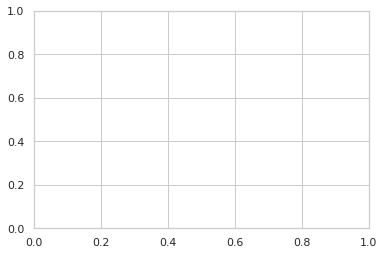

In [40]:
#Fatalities by bed (ICU Y/N)
sns.histplot(data=filtered_admissions[(filtered_admissions.severity == 5) & ('n_days_icu' == 0)], x="_gender", multiple="dodge", shrink=.8)
# title
new_title = 'Fatality outside ICU by Gender'
g._legend.set_title(new_title)

In [36]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [37]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
